In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def parser(record):
    img_features = tf.parse_single_example(
            record,
            features={ 'Label'    : tf.FixedLenFeature([], tf.int64),
                       'image_raw': tf.FixedLenFeature([], tf.string),
                       'height':tf.FixedLenFeature([],tf.int64),
                       'width':tf.FixedLenFeature([],tf.int64),
                       'channel':tf.FixedLenFeature([],tf.int64)})
    height = tf.cast(img_features['height'], tf.int64)
    width = tf.cast(img_features['width'], tf.int64)
    channel = tf.cast(img_features['channel'], tf.int64)
#     image_shape = tf.parallel_stack([height, width, channel])
    label = tf.cast(img_features['Label'], tf.int64)
    
    image = tf.decode_raw(img_features['image_raw'], tf.uint8)
    image = tf.reshape(image, [299,299,3])
#     image.set_shape([299,299,3])
    
    return image, label

In [3]:
test_files = tf.train.match_filenames_once("./data/Train.tfrecords")
test_dataset = tf.data.TFRecordDataset(test_files)
test_dataset = test_dataset.map(parser)

test_dataset = test_dataset.map(
    lambda image,label:(
        tf.image.resize_images(image,[299,299],method=0),label))
test_dataset = test_dataset.batch(32)
test_iterator = test_dataset.make_initializable_iterator()

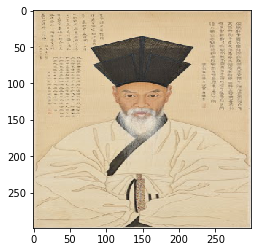

In [2]:
save_model_path = './logs/1557708908/model/TransferModel'

img = cv2.imdecode(np.fromfile(r"./TestPic/401_/401_.png",dtype=np.uint8),-1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(299,299))
plt.imshow(img)
plt.show()

In [ ]:
save_model_path = './logs/1557708908/model/TransferModel.cpkt'
with tf.Session() as sess:
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, './logs/1557708908/model')
    
#     train_writer = tf.summary.FileWriter('logs/test',sess.graph)
   
#     x = loaded_graph.get_tensor_by_name('input_x:0')
#     y = loaded_graph.get_tensor_by_name('input_y:0')
#     logits = loaded_graph.get_tensor_by_name('logits:0')
#     image_labels = tf.one_hot(y,1000)
#     correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(image_labels,1))
#     accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32), name='accuracy')
#     prediction = tf.nn.softmax(logits)
    
#     pred,acc = sess.run([prediction,accuracy],feed_dict={x:[img],y:[264]})
#     pred = tf.argmax(pred,1)
#     print(pred.eval())
#     accuracy = loaded_graph.get_tensor_by_name('accuracy:0')
    
#     test_acc = []
#     while True:
#         try:
#             test_image,test_label = sess.run([test_image_batch,test_label_batch])
#             test_acctemp = sess.run([accuracy],feed_dict={x: test_image,y:test_label})
#             test_acc.append(test_acctemp)
#         except:
#             test_p_acc = np.mean(test_acc)
#             print('test_acc %f' % (test_p_acc))

INFO:tensorflow:Restoring parameters from ./logs/1557708908/model


In [12]:
sess = tf.Session()
new_saver = tf.train.import_meta_graph(save_model_path+".meta")
new_saver.restore(sess, tf.train.latest_checkpoint('./logs/1557571078/model/'))
prediction = tf.get_collection('pred_network')[0]

graph = tf.get_default_graph()
x = graph.get_tensor_by_name("input_x:0")

INFO:tensorflow:Restoring parameters from ./logs/1557571078/model/TransferModel


In [8]:
label = sess.run(prediction,feed_dict={x:[img]})
print(label)

[38]


In [6]:
loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)
    
    prediction = tf.get_collection('pred_network')[0]
    x = loaded_graph.get_tensor_by_name("input_x:0")
    
    label = sess.run(prediction,feed_dict={x:[img]})
    print(label)

INFO:tensorflow:Restoring parameters from ./logs/1557571078/model/TransferModel
[223]
